In [1]:
import pandas as pd

products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')
customers = pd.read_csv('/content/Customers.csv')

In [2]:
print(products.info())
print(transactions.info())
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
<

In [3]:
print(products.head())
print(transactions.head())
print(customers.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawre

In [4]:
merged_df = transactions.merge(products, on='ProductID', how='left')

In [5]:
merged_df = merged_df.merge(customers, on='CustomerID', how='left')


In [6]:
merged_df = merged_df.dropna()

In [7]:
merged_df['Category'].fillna('Unknown', inplace=True)

<ipython-input-7-e90ddf114395>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Category'].fillna('Unknown', inplace=True)


In [8]:
merged_df = merged_df.drop_duplicates()

In [9]:
print(merged_df.describe(include='all'))

       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T00001      C0109      P059  2024-08-25 12:38:23          NaN   
freq               1         11        19                    1          NaN   
mean             NaN        NaN       NaN                  NaN     2.537000   
std              NaN        NaN       NaN                  NaN     1.117981   
min              NaN        NaN       NaN                  NaN     1.000000   
25%              NaN        NaN       NaN                  NaN     2.000000   
50%              NaN        NaN       NaN                  NaN     3.000000   
75%              NaN        NaN       NaN                  NaN     4.000000   
max              NaN        NaN       NaN                  NaN     4.000000   

         TotalValue     Price_x            ProductN

In [10]:
print(merged_df.nunique())

TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price_x             100
ProductName          66
Category              4
Price_y             100
CustomerName        199
Region                4
SignupDate          178
dtype: int64


In [11]:
print(merged_df['Category'].value_counts())

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


In [12]:
revenue_by_category = merged_df.groupby('Category')['TotalValue'].sum()
print(revenue_by_category)

Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [13]:
revenue_by_region = merged_df.groupby('Region')['TotalValue'].sum()
print(revenue_by_region)

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


Customer Analysis

In [14]:
avg_spend = merged_df.groupby('CustomerID')['TotalValue'].mean()
print(avg_spend)

CustomerID
C0001     670.904000
C0002     465.685000
C0003     681.345000
C0004     669.360000
C0005     678.080000
            ...     
C0196    1245.720000
C0197     642.883333
C0198     465.915000
C0199     494.820000
C0200     951.720000
Name: TotalValue, Length: 199, dtype: float64


In [15]:
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print(top_products.head(10))


ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [16]:
profitable_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print(profitable_products.head(10))


ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


In [17]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])


In [18]:
monthly_revenue = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print(monthly_revenue)


TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


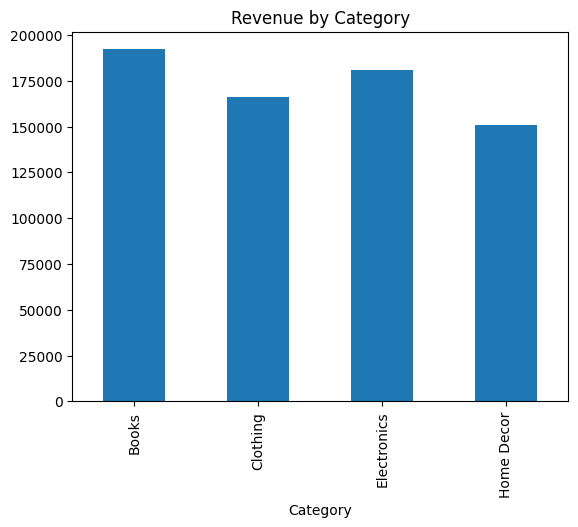

In [20]:
revenue_by_category.plot(kind='bar')
plt.title('Revenue by Category')
plt.show()


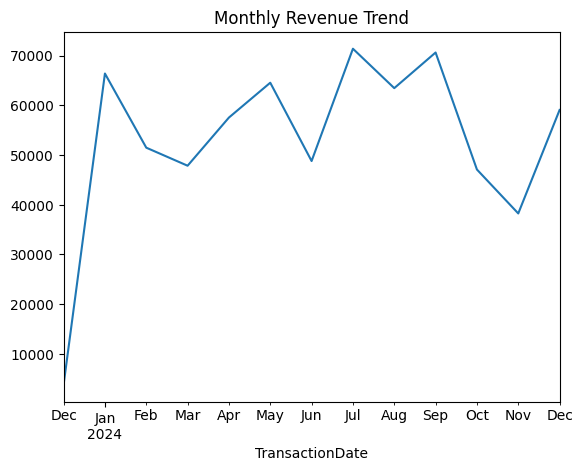

In [21]:
monthly_revenue.plot(kind='line')
plt.title('Monthly Revenue Trend')
plt.show()


In [22]:
print(merged_df.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')


In [23]:
print(merged_df[['Price_x', 'Price_y']].head())

   Price_x  Price_y
0   300.68   300.68
1   300.68   300.68
2   300.68   300.68
3   300.68   300.68
4   300.68   300.68


In [24]:
merged_df.rename(columns={'Price_y': 'Price'}, inplace=True)


In [25]:
merged_df.drop(columns=['Price_x'], inplace=True)


In [26]:
merged_df = transactions.merge(products, on='ProductID', how='left', suffixes=('_trans', '_prod'))


In [27]:
print(merged_df.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_trans', 'ProductName', 'Category',
       'Price_prod'],
      dtype='object')


In [28]:
print(merged_df.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_trans', 'ProductName', 'Category',
       'Price_prod'],
      dtype='object')


In [29]:
merged_df.rename(columns={'Price_trans': 'Price'}, inplace=True)
merged_df.drop(columns=['Price_prod'], inplace=True)


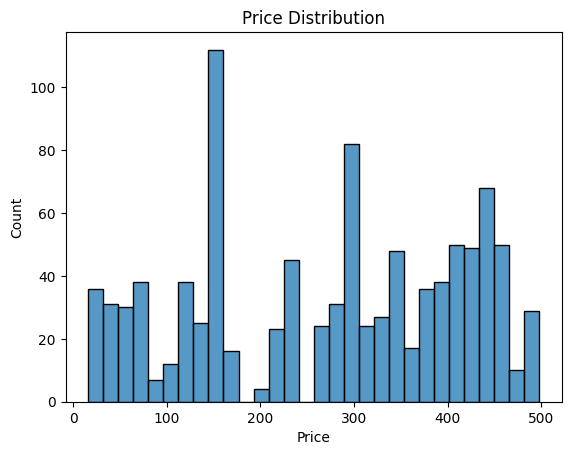

In [30]:
sns.histplot(merged_df['Price'], bins=30)
plt.title('Price Distribution')
plt.show()


Customer Lifetime Value Analysis

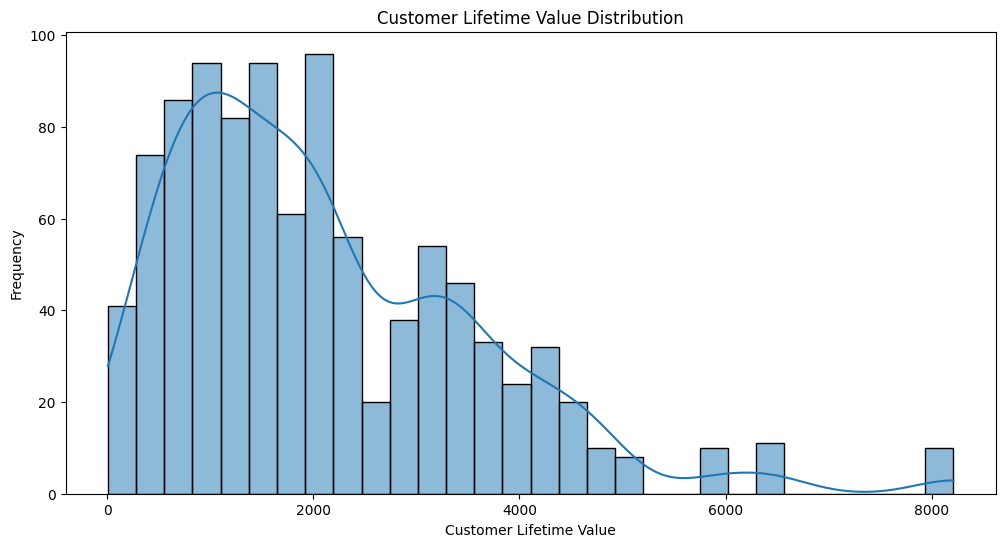

In [33]:
# Ensure TransactionDate is in datetime format
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'], errors='coerce')

# Drop rows with invalid dates (if any)
merged_df = merged_df.dropna(subset=['TransactionDate'])

# Calculate TotalSpent, TransactionCount, and CLV
merged_df['TotalSpent'] = merged_df.groupby('CustomerID')['TotalValue'].transform('sum')
merged_df['TransactionCount'] = merged_df.groupby('CustomerID')['TransactionID'].transform('count')
merged_df['CLV'] = merged_df['TotalSpent'] * (merged_df['TransactionCount'] / len(merged_df['TransactionDate'].dt.to_period('M').unique()))

# Visualize Customer Lifetime Value Distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['CLV'], kde=True, bins=30)
plt.title("Customer Lifetime Value Distribution")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency")
plt.show()


Repeat Customers vs One-Time Customers

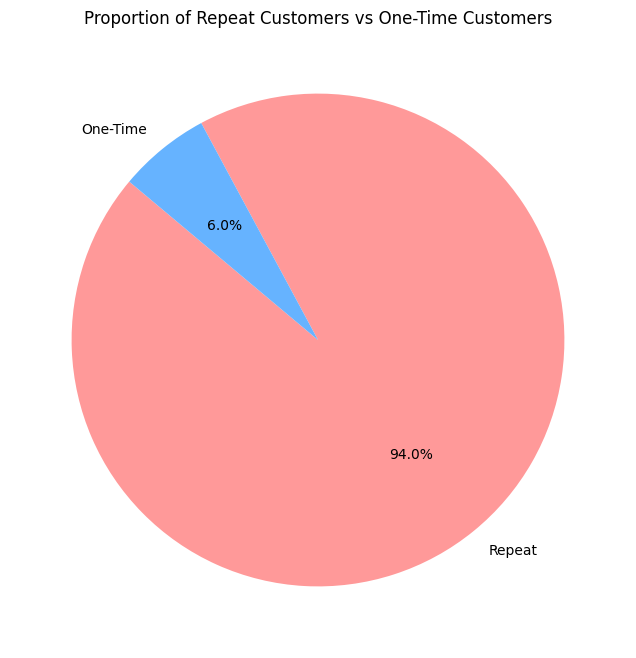

In [34]:
repeat_customers = merged_df.groupby('CustomerID')['TransactionID'].count().apply(lambda x: 'Repeat' if x > 1 else 'One-Time')
repeat_counts = repeat_customers.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(repeat_counts, labels=repeat_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.title("Proportion of Repeat Customers vs One-Time Customers")
plt.show()


Customer Segmentation by Region

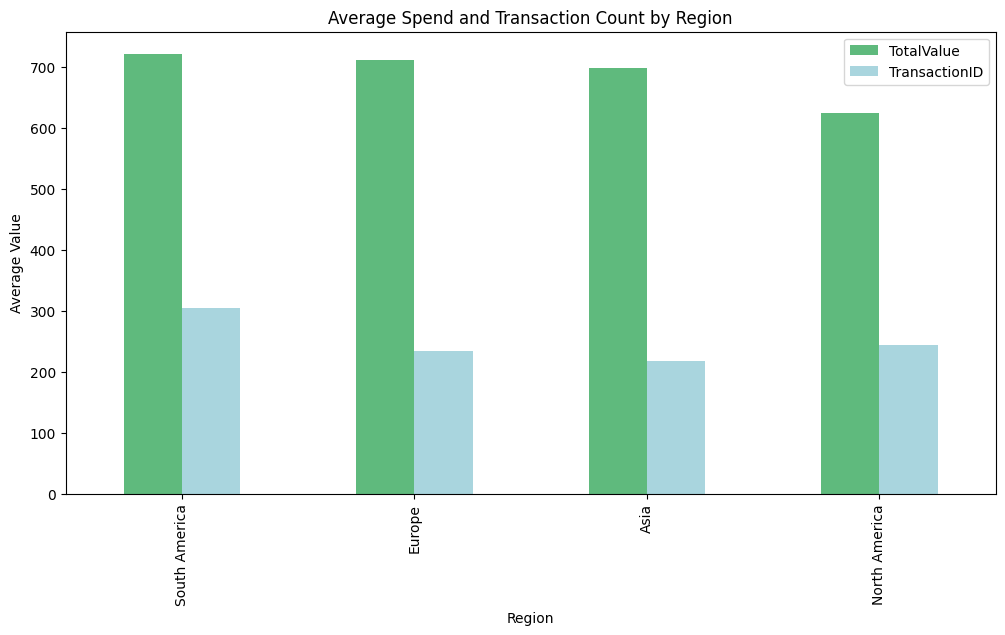

In [42]:
region_analysis = merged_df.groupby('Region').agg({
    'TotalValue': 'mean',
    'TransactionID': 'count'
}).sort_values('TotalValue', ascending=False)

region_analysis.plot(kind='bar', figsize=(12, 6), color=['#5fba7d', '#a9d5de'])
plt.title("Average Spend and Transaction Count by Region")
plt.ylabel("Average Value")
plt.xlabel("Region")
plt.show()


Customer Churn Analysis

<ipython-input-36-6c50f0552dac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="coolwarm")


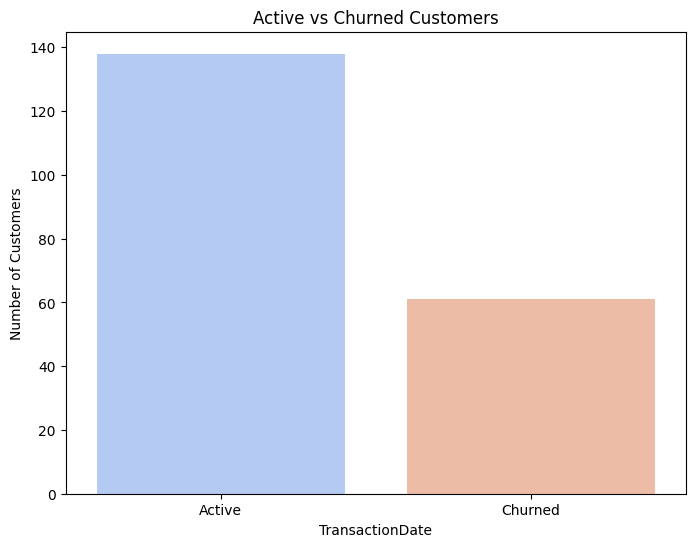

In [36]:
recent_date = merged_df['TransactionDate'].max()
last_transaction = merged_df.groupby('CustomerID')['TransactionDate'].max()
churn_analysis = last_transaction.apply(lambda x: 'Active' if (recent_date - x).days <= 90 else 'Churned')
churn_counts = churn_analysis.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="coolwarm")
plt.title("Active vs Churned Customers")
plt.ylabel("Number of Customers")
plt.show()


Product Performance by Region

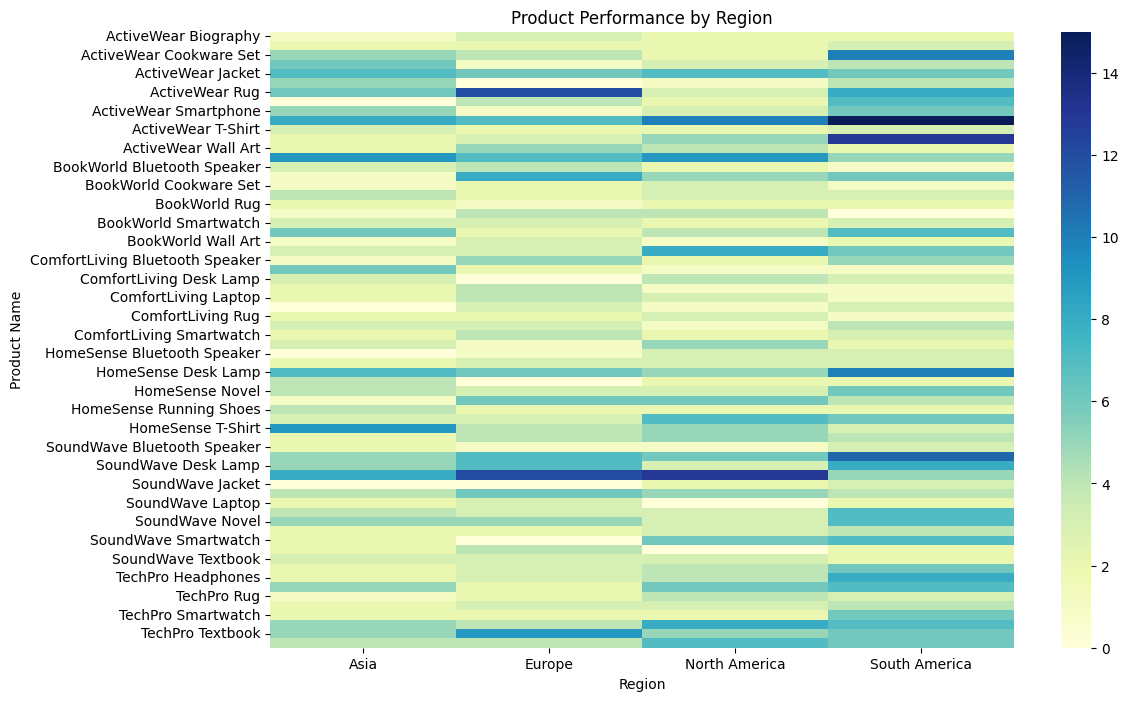

In [41]:
product_region = merged_df.groupby(['ProductName', 'Region']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(product_region, cmap="YlGnBu", annot=False)
plt.title("Product Performance by Region")
plt.xlabel("Region")
plt.ylabel("Product Name")
plt.show()


In [38]:
print(merged_df.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'ProductName', 'Category',
       'TotalSpent', 'TransactionCount', 'CLV'],
      dtype='object')


In [39]:
print(customers.columns)


Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')


In [40]:
merged_df = pd.merge(merged_df, customers[['CustomerID', 'Region']], on='CustomerID', how='left')


Top Spending Customers

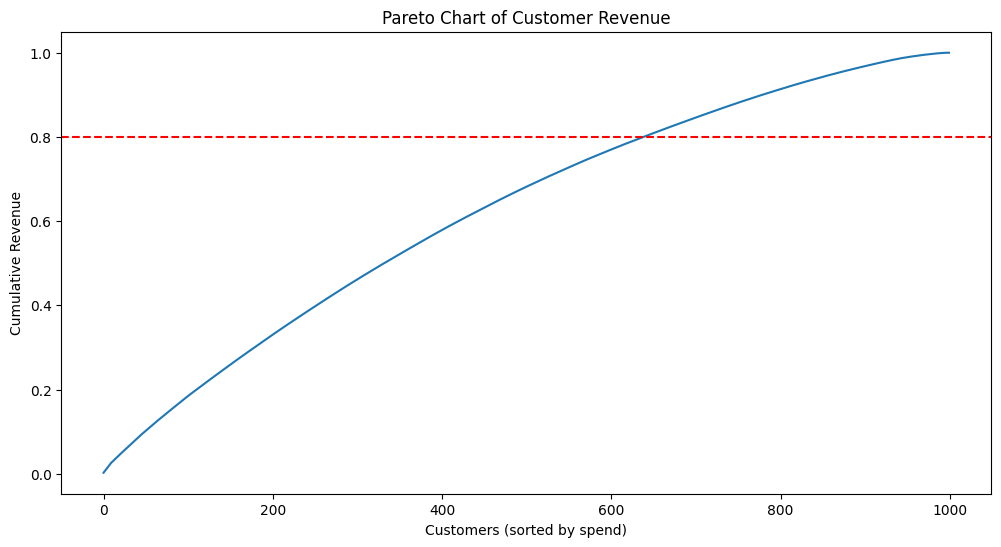

In [43]:
merged_df = merged_df.sort_values('TotalSpent', ascending=False).reset_index(drop=True)
merged_df['CumulativeRevenue'] = merged_df['TotalSpent'].cumsum() / merged_df['TotalSpent'].sum()

plt.figure(figsize=(12, 6))
plt.plot(range(len(merged_df)), merged_df['CumulativeRevenue'])
plt.axhline(y=0.8, color='r', linestyle='--')  # 80% revenue line
plt.title("Pareto Chart of Customer Revenue")
plt.xlabel("Customers (sorted by spend)")
plt.ylabel("Cumulative Revenue")
plt.show()


Time-Based Transaction Analysis

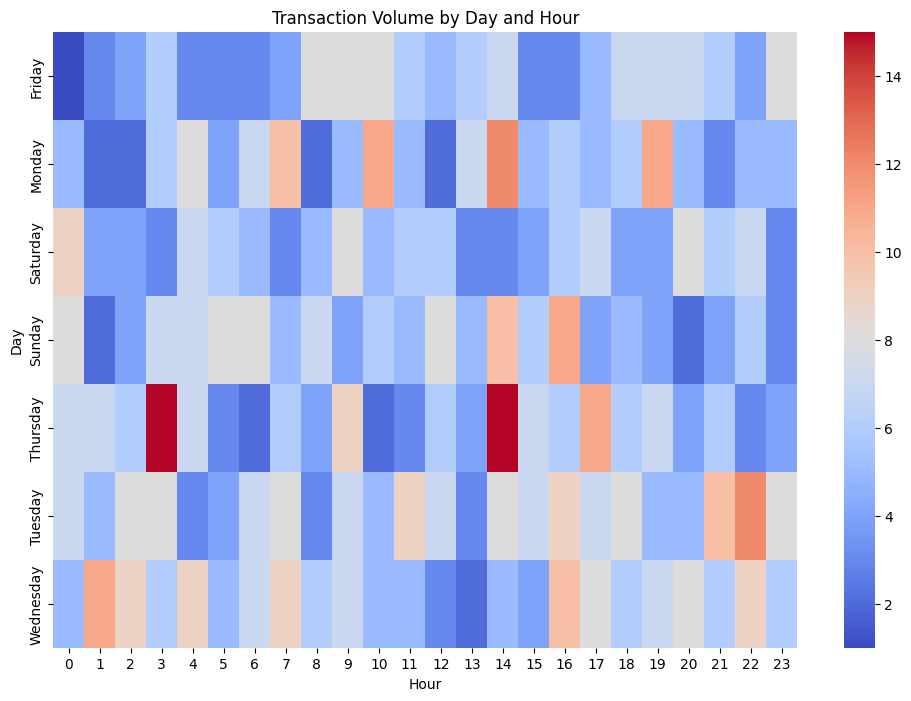

In [44]:
merged_df['Hour'] = merged_df['TransactionDate'].dt.hour
merged_df['Day'] = merged_df['TransactionDate'].dt.day_name()
hourly_daily = merged_df.groupby(['Day', 'Hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(hourly_daily, cmap="coolwarm", annot=False)
plt.title("Transaction Volume by Day and Hour")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.show()


RFM (Recency, Frequency, Monetary) Analysis

<ipython-input-46-a826939775af>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=rfm, x='Recency', y='Monetary', size='Frequency', palette='viridis')


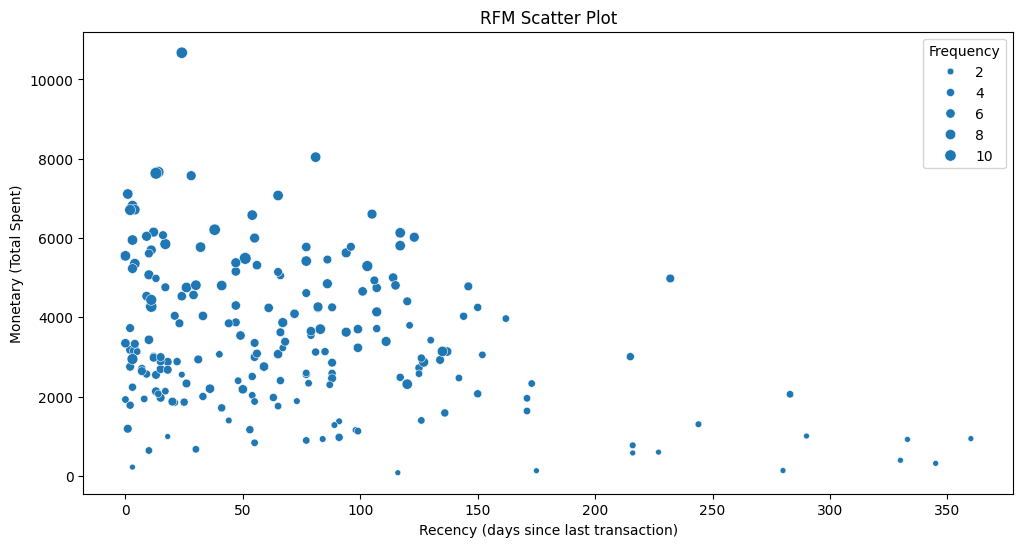

In [46]:
rfm = merged_df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (recent_date - x.max()).days,  # Recency
    'TransactionID': 'count',  # Frequency
    'TotalValue': 'sum'  # Monetary
}).rename(columns={'TransactionDate': 'Recency', 'TransactionID': 'Frequency', 'TotalValue': 'Monetary'})

plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', size='Frequency', palette='viridis')
plt.title("RFM Scatter Plot")
plt.xlabel("Recency (days since last transaction)")
plt.ylabel("Monetary (Total Spent)")
plt.show()
